In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [19]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [23]:
ops.reset_default_graph()
with tf.Session() as sess:
    lr = 0.1
    bs = 25
    it = 50
    
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    model_output = tf.add(tf.matmul(x_data, A), b)
    loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt_l1 = tf.train.GradientDescentOptimizer(lr)
    train_step_l1 = my_opt_l1.minimize(loss_l1)
    
    loss_vec_l1 = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals), size=bs)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec_l1.append(temp_loss)
        if (i + 1) % 25 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))

Step #25 A = [[2.4072437]] b = [[1.928442]]
Loss = 1.5061603
Step #50 A = [[2.1828444]] b = [[2.788442]]
Loss = 1.1517581


In [24]:
ops.reset_default_graph()
with tf.Session() as sess:
    lr = 0.1
    bs = 25
    it = 50
    
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
    
    A = tf.Variable(tf.random_normal(shape=[1, 1]))
    b = tf.Variable(tf.random_normal(shape=[1, 1]))
    model_output = tf.add(tf.matmul(x_data, A), b)
    loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt_l2 = tf.train.GradientDescentOptimizer(lr)
    train_step_l2 = my_opt_l1.minimize(loss_l2)
    
    loss_vec_l2 = []
    for i in range(it):
        rand_index = np.random.choice(len(x_vals), size=bs)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec_l2.append(temp_loss)
        if (i + 1) % 25 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))

Step #25 A = [[1.8100066]] b = [[3.5385623]]
Loss = 0.59495527
Step #50 A = [[1.1501669]] b = [[4.2738285]]
Loss = 0.41740292


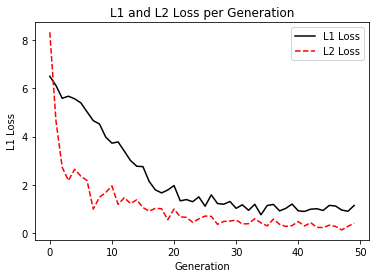

In [25]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
loss_vec_l2

[]